In [31]:
import pandas as pd
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/Abdullahfoysal/pp11-Project-AnalyzeAndVisualize/refs/heads/main/student_data.csv

--2024-12-21 04:58:11--  https://raw.githubusercontent.com/Abdullahfoysal/pp11-Project-AnalyzeAndVisualize/refs/heads/main/student_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133023 (130K) [text/plain]
Saving to: ‘student_data.csv.1’

student_data.csv.1  100%[===================>] 129.91K  --.-KB/s    in 0.04s   

2024-12-21 04:58:12 (3.18 MB/s) - ‘student_data.csv.1’ saved [133023/133023]



In [37]:
# Count the total number of the unique departments

student_data = pd.read_csv("student_data.csv")

unique_departments = student_data["department"].nunique()

print(f"Total number unique departments: {unique_departments}")

Total number unique departments: 5


In [38]:
# Display students who have attended study abroad in the USA

usa_students = student_data[student_data["study_abroad_country"] == "USA"]

print(usa_students)

Empty DataFrame
Columns: [id, first_name, last_name, email, gender, ip_address, cgpa, passing_year, department, attendance, home_district, abroad_study, student_id, graduation_date, study_abroad_country, study_abroad_city, hsc_gpa, ssc_gpa]
Index: []


In [40]:
# Calculate the percentage of the students who have completed their graduation

total_students = len(student_data)

graduate_students = len(student_data[student_data["graduation_date"] < 2020])

graduate_percentage = (graduate_students / total_students) * 100

print("Students having graduation date before 2020 is considered as graduate")

print()

print(f"Percentage of Graduate Students: {graduate_percentage}%")

Students having graduation date before 2020 is considered as graduate

Percentage of Graduate Students: 94.69999999999999%


In [49]:
# Create a new column for students with an average GPA of 4 in both SSC and HSC

student_data["average_gpa_4"] = ((student_data["ssc_gpa"] + student_data["hsc_gpa"]) / 2) == 4

student_data["average_gpa_4"] = student_data["average_gpa_4"].apply(lambda x: "Yes" if x else "No")

print(student_data[["id","first_name","last_name","email","average_gpa_4"]].sample(2))

student_data.to_csv("updated_students_data.csv", index=False)

      id first_name last_name                  email average_gpa_4
620  621     Gerick   Dickson  gdicksonh8@google.com            No
384  385    Minerva  Fullagar   mfullagarao@ebay.com            No


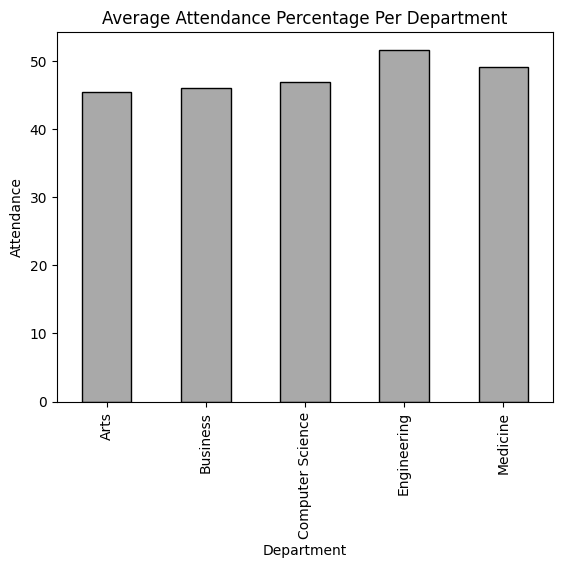

In [50]:
# Plot a bar chart of attendance percentage per department

attendance_per_department = student_data.groupby("department")["attendance"].mean()

attendance_per_department.plot(kind="bar", color="darkgray", edgecolor="black")

plt.title("Average Attendance Percentage Per Department")
plt.xlabel("Department")
plt.ylabel("Attendance")

plt.show()